Random Forest
 
Assignment


About the data: 
Let’s consider a Company dataset with around 10 variables and 400 records. 
The attributes are as follows: 
 Sales -- Unit sales (in thousands) at each location
 Competitor Price -- Price charged by competitor at each location
 Income -- Community income level (in thousands of dollars)
 Advertising -- Local advertising budget for company at each location (in thousands of dollars)
 Population -- Population size in region (in thousands)
 Price -- Price company charges for car seats at each site
 Shelf Location at stores -- A factor with levels Bad, Good and Medium indicating the quality of the shelving location for the car seats at each site
 Age -- Average age of the local population
 Education -- Education level at each location
 Urban -- A factor with levels No and Yes to indicate whether the store is in an urban or rural location
 US -- A factor with levels No and Yes to indicate whether the store is in the US or not
The company dataset looks like this: 
 
Problem Statement:
A cloth manufacturing company is interested to know about the segment or attributes causes high sale. 
Approach - A Random Forest can be built with target variable Sales (we will first convert it in categorical variable) & all other variable will be independent in the analysis.  


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import  DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the data
company_data=pd.read_csv('Company_Data.csv')
company_data

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...
395,12.57,138,108,17,203,128,Good,33,14,Yes,Yes
396,6.14,139,23,3,37,120,Medium,55,11,No,Yes
397,7.41,162,26,12,368,159,Medium,40,18,Yes,Yes
398,5.94,100,79,7,284,95,Bad,50,12,Yes,Yes


## Data Exploration

In [3]:
# checking for null values 
company_data.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

In [4]:
company_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [5]:
# checking for duplicate values
company_data[company_data.duplicated()]

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US


In [6]:
company_data.describe()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,7.496325,124.975000,68.657500,6.635000,264.840000,115.795000,53.322500,13.900000
std,2.824115,15.334512,27.986037,6.650364,147.376436,23.676664,16.200297,2.620528
min,0.000000,77.000000,21.000000,0.000000,10.000000,24.000000,25.000000,10.000000
25%,5.390000,115.000000,42.750000,0.000000,139.000000,100.000000,39.750000,12.000000
50%,7.490000,125.000000,69.000000,5.000000,272.000000,117.000000,54.500000,14.000000
75%,9.320000,135.000000,91.000000,12.000000,398.500000,131.000000,66.000000,16.000000
max,16.270000,175.000000,120.000000,29.000000,509.000000,191.000000,80.000000,18.000000


As we show that feature are not in same scale.The mean of population is 264.84 while the mean of Advertising is 6.635 so we should bring it in a same scale by standardize it.

In [7]:
# convert sales data in catogerical as mention in question
company_data.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

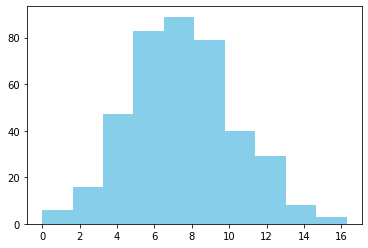

In [8]:
plt.hist('Sales',data=company_data ,color='skyblue')
plt.show()

As we show that Sales data looks like normally distributed so we can take mean or median as throushold value to make two or three catogeric.

In [9]:
# converting sales in catogerical
data=company_data.copy()
data['Sales_cat'] = pd.cut(x = data['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
data.head()

,Sales,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,9.50,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,11.22,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,10.06,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,7.40,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,4.15,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [10]:
data['Sales_cat'].value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [12]:
# List of Numerical Variables 
numerical_features = data.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

In [13]:
# categorical variables 
categorical_features = data.describe(include=["object"]).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US'], dtype='object')

In [14]:
# check for cardinality in categorical variables
for var in categorical_features:
    print(var, ' contains ', len(data[var].unique()), ' labels')

ShelveLoc  contains  3  labels
Urban  contains  2  labels
US  contains  2  labels


As we show that labels are not must large so we shoud use dummies encoder  to convert it in numeric

## Exploratory Data Analysis

In [15]:
# checking for correlation
data.corr()

,Sales,CompPrice,Income,Advertising,Population,Price,Age,Education
Sales,1.000000,0.064079,0.151951,0.269507,0.050471,-0.444951,-0.231815,-0.051955
CompPrice,0.064079,1.000000,-0.080653,-0.024199,-0.094707,0.584848,-0.100239,0.025197
Income,0.151951,-0.080653,1.000000,0.058995,-0.007877,-0.056698,-0.004670,-0.056855
Advertising,0.269507,-0.024199,0.058995,1.000000,0.265652,0.044537,-0.004557,-0.033594
Population,0.050471,-0.094707,-0.007877,0.265652,1.000000,-0.012144,-0.042663,-0.106378
Price,-0.444951,0.584848,-0.056698,0.044537,-0.012144,1.000000,-0.102177,0.011747
Age,-0.231815,-0.100239,-0.004670,-0.004557,-0.042663,-0.102177,1.000000,0.006488
Education,-0.051955,0.025197,-0.056855,-0.033594,-0.106378,0.011747,0.006488,1.000000


(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5]),
 [Text(0.5, 0, 'Sales'),
  Text(1.5, 0, 'CompPrice'),
  Text(2.5, 0, 'Income'),
  Text(3.5, 0, 'Advertising'),
  Text(4.5, 0, 'Population'),
  Text(5.5, 0, 'Price'),
  Text(6.5, 0, 'Age'),
  Text(7.5, 0, 'Education')])

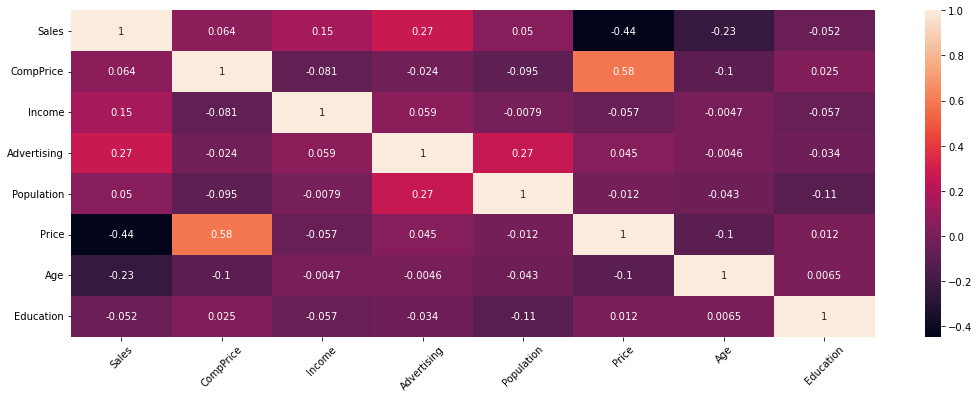

In [16]:
# Heatmap visualization
fig= plt.figure(figsize=(18, 6))
sns.heatmap(data.corr(), annot=True);
plt.xticks(rotation=45)

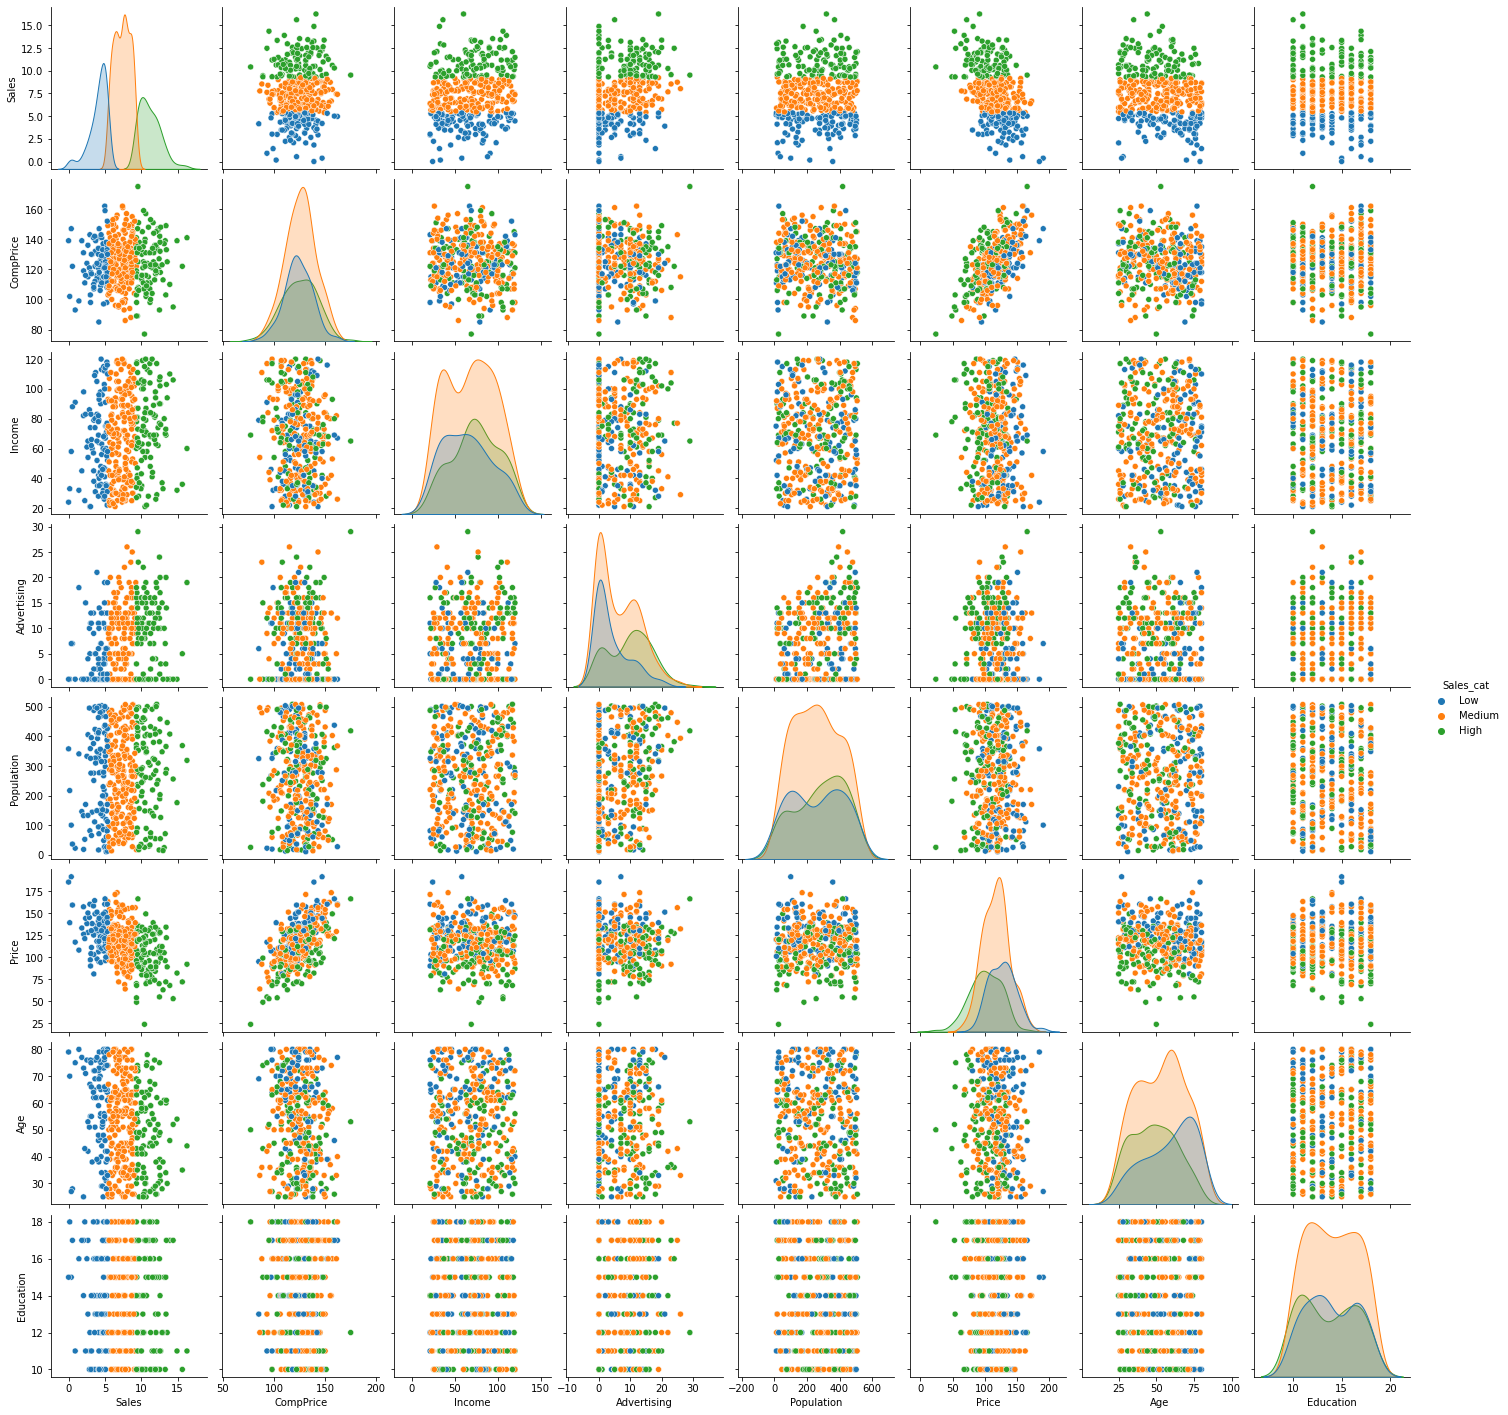

In [17]:
# pair plot data 
sns.pairplot(data=data,hue='Sales_cat')

By visualization of heatmap and pair plot we say that their are no correlation between features.

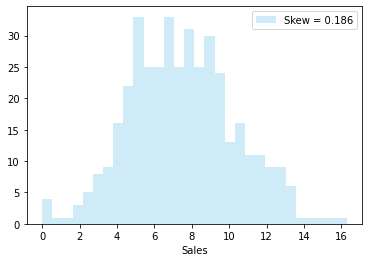

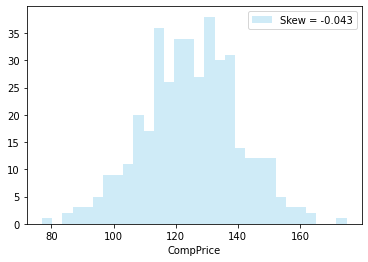

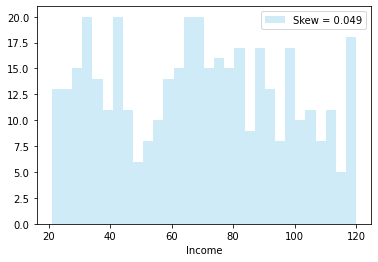

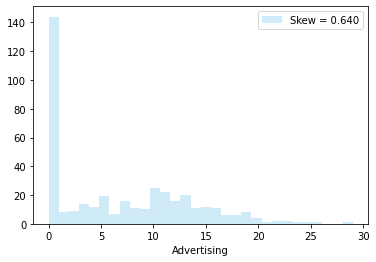

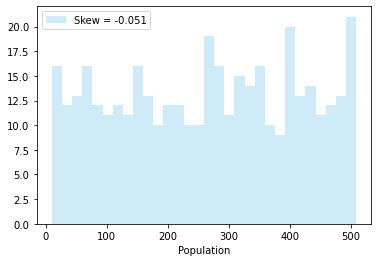

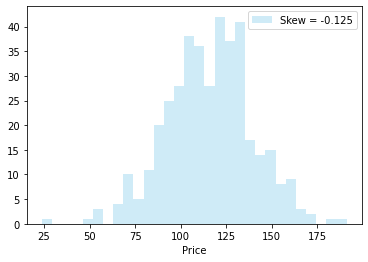

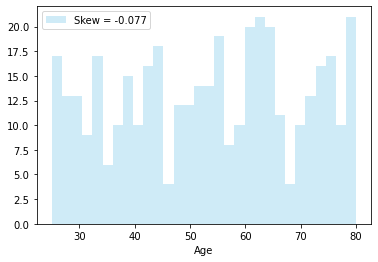

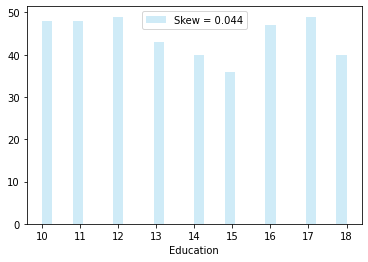

In [18]:
# Histogram visualization of numeric variables
for feat in numerical_features:
    skew = data[feat].skew()
    sns.distplot(data[feat], kde= False,color='skyblue', label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed.Advertising have high skew so we shoud check for outliers by ploting boxplot.

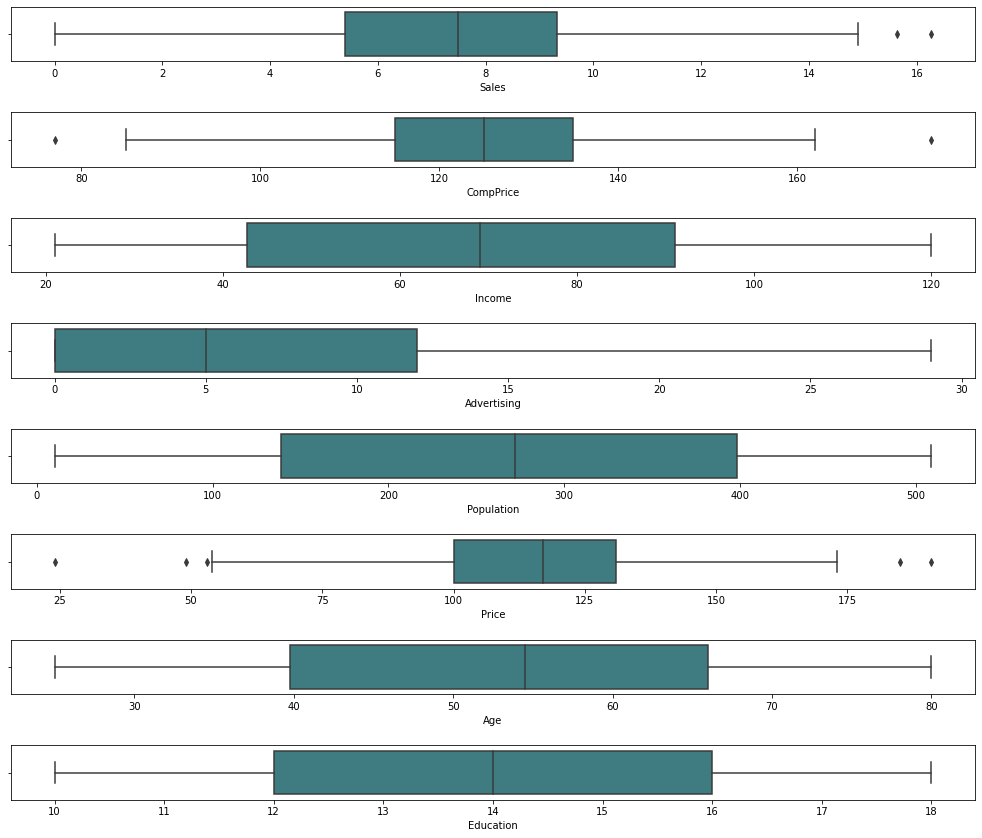

In [19]:
# Checking for outliers
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=data,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=data,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=data,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=data,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=data,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=data,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=data,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=data,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

We observe that only 2,3 outliers are present in price and campPrice which we should remove in data pre-processing

<AxesSubplot:xlabel='Sales_cat', ylabel='count'>

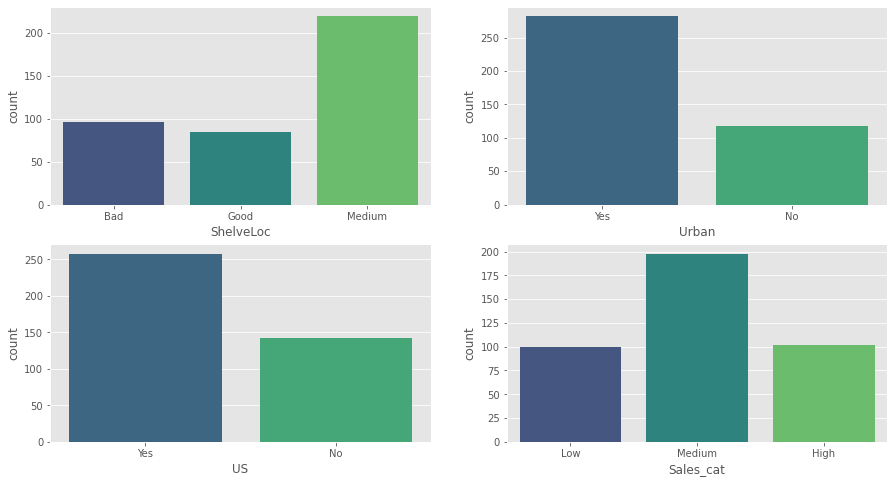

In [20]:
# countplot for visualization for categorical data
plt.style.use("ggplot")
fig, ax =plt.subplots(2,2, figsize=(15,8)) 
sns.countplot(data["ShelveLoc"], palette="viridis", ax=ax[0,0])
sns.countplot(data["Urban"], palette="viridis", ax=ax[0,1])
sns.countplot(data["US"], palette="viridis", ax=ax[1,0])
sns.countplot(data["Sales_cat"], palette="viridis", ax=ax[1,1])

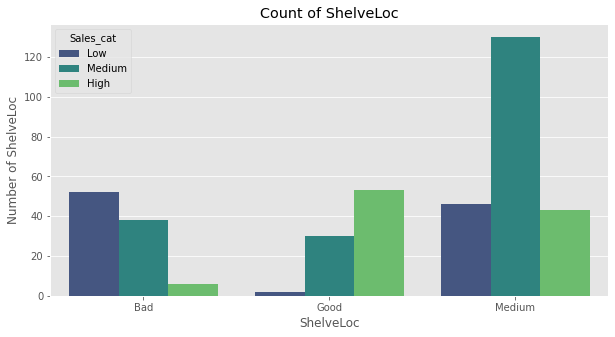

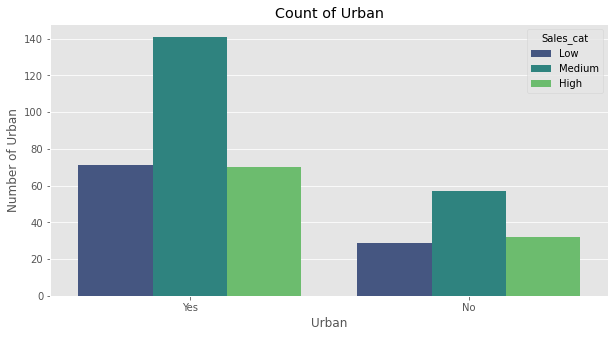

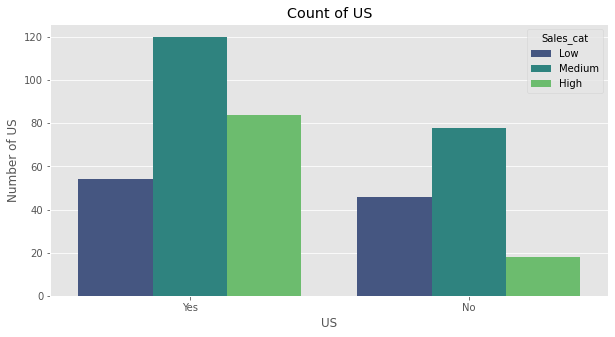

In [21]:
# visualization of categorical data w.r.t. Sales_cat
for var,column in enumerate(categorical_features):
    plt.figure(figsize=(10, 5))
    unique = data[column].value_counts(ascending=True);   
    plt.title("Count of "+ column)
    sns.countplot(data=data, x=column,palette = "viridis",hue='Sales_cat')
    plt.xlabel(column)
    plt.ylabel("Number of "+ column)

By visualization we show that the quality of shelving location for the car seats at each sit has  counts high value of medium quality. Most of stores are located in US and most of stores are in urban area.  

#### Checking for imblance and balanced dataset

In [22]:
data['Sales_cat'].value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

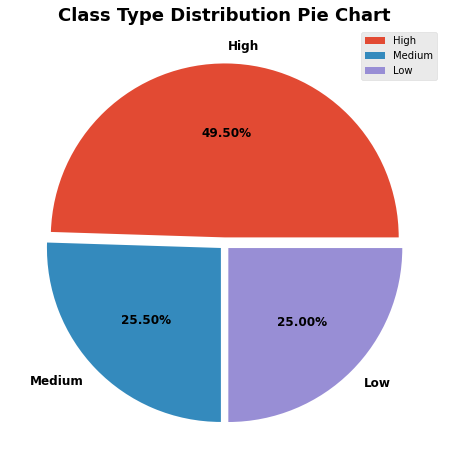

In [23]:
# pie plot for Sales_cat
plt.figure(figsize = (12,8))
plt.pie(data['Sales_cat'].value_counts(),labels=data.Sales_cat.unique(),explode = [0.04,0.03,0.03],autopct= '%.2f%%',
       textprops = {'size':'large','fontweight':'bold','rotation':'0','color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

We have imblanced dataset.

## Data pre-processing

In [24]:
# Droping of unwanted columns
df= data.copy()
df.drop('Sales',axis=1, inplace =True)
df.head()

,CompPrice,Income,Advertising,Population,Price,ShelveLoc,Age,Education,Urban,US,Sales_cat
0,138,73,11,276,120,Bad,42,17,Yes,Yes,High
1,111,48,16,260,83,Good,65,10,Yes,Yes,High
2,113,35,10,269,80,Medium,59,12,Yes,Yes,High
3,117,100,4,466,97,Medium,55,14,Yes,Yes,Medium
4,141,64,3,340,128,Bad,38,13,Yes,No,Low


In [25]:
# use dummeis encoder for categorical features except target features 
df = pd.get_dummies(df.iloc[:,:-1])
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0


In [26]:
# rename of column and apply label encoder to target variables
df['Sales'] = data.Sales_cat
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df["Sales"])
df["Sales"]=le.transform(df["Sales"])
df.head()

,CompPrice,Income,Advertising,Population,Price,Age,Education,ShelveLoc_Bad,ShelveLoc_Good,ShelveLoc_Medium,Urban_No,Urban_Yes,US_No,US_Yes,Sales
0,138,73,11,276,120,42,17,1,0,0,0,1,0,1,0
1,111,48,16,260,83,65,10,0,1,0,0,1,0,1,0
2,113,35,10,269,80,59,12,0,0,1,0,1,0,1,0
3,117,100,4,466,97,55,14,0,0,1,0,1,0,1,2
4,141,64,3,340,128,38,13,1,0,0,0,1,1,0,1


In [27]:
# removing outliers
df1=df.copy()
def outlierDetect(col):
    Q1 = np.percentile(col, 25, interpolation = 'midpoint')  
    Q3 = np.percentile(col, 75, interpolation = 'midpoint')
    IQR = Q3 - Q1
    low_lim = Q1 - 1.5 * IQR
    up_lim = Q3 + 1.5 * IQR
    return low_lim,up_lim

In [28]:
for i in range(5):
    lower,uper=outlierDetect(df1['CompPrice'])
    df1=df1[(df1['CompPrice']<uper )&(df1['CompPrice']>lower)]
    lower,uper=outlierDetect(df1['Price'])
    df1=df1[(df1['Price']<uper )&(df1['Price']>lower)]
    print(df1.shape)

(393, 15)
(391, 15)
(391, 15)
(391, 15)
(391, 15)


In [29]:
# Standardization of data
x = df1.drop('Sales',axis=1)
y = df1[['Sales']]
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_std = sc.fit_transform(x)
x_std

array([[ 0.87258167,  0.15930011,  0.66233854, ...,  0.64947531,
        -0.73441819,  0.73441819],
       [-0.98053535, -0.73254329,  1.42223986, ...,  0.64947531,
        -0.73441819,  0.73441819],
       [-0.84326742, -1.19630186,  0.51035828, ...,  0.64947531,
        -0.73441819,  0.73441819],
       ...,
       [ 2.51979681, -1.51736548,  0.8143188 , ...,  0.64947531,
        -0.73441819,  0.73441819],
       [-1.73550895,  0.37334253,  0.05441749, ...,  0.64947531,
        -0.73441819,  0.73441819],
       [ 0.59804582, -1.12495438, -1.00944436, ...,  0.64947531,
        -0.73441819,  0.73441819]])

In [30]:
# Train_test Split
x_train,x_test,y_train,y_test=train_test_split(x_std,y,test_size=0.3,random_state=0)
x_train.shape,y_train.shape,x_test.shape,y_test.shape

((273, 14), (273, 1), (118, 14), (118, 1))

## Model building with imblance dataset

In [31]:
model_imblance=RandomForestClassifier(random_state=42)
model_imblance.fit(x_train,y_train)
y_train.value_counts()

Sales
2        147
1         67
0         59
dtype: int64

In [32]:
pred_train_i = model_imblance.predict(x_train)
print('Train data Accuracy :',accuracy_score(y_train,pred_train_i))
print('Train Report\n',classification_report(y_train,pred_train_i))
print('Confusion matrix of train \n',confusion_matrix(y_train,pred_train_i))

pred_test_i = model_imblance.predict(x_test)
print('\n\nTest data Accuracy  :',accuracy_score(y_test,pred_test_i))
print('Test Report\n',classification_report(y_test,pred_test_i))
print('Confusion matrix of test \n',confusion_matrix(y_test,pred_test_i))


Train data Accuracy : 1.0
Train Report
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        67
           2       1.00      1.00      1.00       147

    accuracy                           1.00       273
   macro avg       1.00      1.00      1.00       273
weighted avg       1.00      1.00      1.00       273

Confusion matrix of train 
 [[ 59   0   0]
 [  0  67   0]
 [  0   0 147]]


Test data Accuracy  : 0.635593220338983
Test Report
               precision    recall  f1-score   support

           0       0.83      0.51      0.63        37
           1       0.71      0.50      0.59        30
           2       0.55      0.80      0.66        51

    accuracy                           0.64       118
   macro avg       0.70      0.61      0.63       118
weighted avg       0.68      0.64      0.63       118

Confusion matrix of test 
 [[19  0 18]
 [ 0 15 15]
 [ 4  6 41]]


## Balance the Imblanced data using different technique

In [33]:
# Define function to build model for different technique 
def sampling(x_train,x_test,y_train,y_test):
    model=DecisionTreeClassifier(random_state=42)
    model.fit(x_train,y_train)
    pred_test_s=model.predict(x_test)
    print('Test classification Report\n',classification_report(y_test,pred_test_s))
    return()

#### Undersampling technique

In [34]:
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler()
x_under, y_under = undersample.fit_resample(x_std, y)
y_under.value_counts()

Sales
0        96
1        96
2        96
dtype: int64

In [35]:
#spliting the new sample in train test
x_train,x_test,y_train,y_test=train_test_split(x_under,y_under,test_size=0.3,random_state=42,stratify=y_under)
# calling function
sampling(x_train,x_test,y_train,y_test)

Test classification Report
               precision    recall  f1-score   support

           0       0.72      0.72      0.72        29
           1       0.50      0.48      0.49        29
           2       0.33      0.34      0.34        29

    accuracy                           0.52        87
   macro avg       0.52      0.52      0.52        87
weighted avg       0.52      0.52      0.52        87



()

#### Oversampling technique

In [36]:
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler()
x_over, y_over = oversample.fit_resample(x_std, y)
y_over.value_counts()

Sales
0        198
1        198
2        198
dtype: int64

In [37]:
# spliting the new sample in train test
x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42,stratify=y_over)
# calling function
sampling(x_train,x_test,y_train,y_test)


Test classification Report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82        59
           1       0.78      0.93      0.85        60
           2       0.70      0.55      0.62        60

    accuracy                           0.77       179
   macro avg       0.77      0.77      0.76       179
weighted avg       0.77      0.77      0.76       179



()

#### SMOTE technique

In [38]:
from imblearn.over_sampling import SMOTE
smote=SMOTE()
x_sm,y_sm = smote.fit_resample(x_std,y)
y_sm.value_counts()

Sales
0        198
1        198
2        198
dtype: int64

In [39]:
# spliting data into train test
x_train,x_test,y_train,y_test=train_test_split(x_sm,y_sm,test_size=0.3,random_state=42,stratify=y_sm)
# calling function
sampling(x_train,x_test,y_train,y_test)

Test classification Report
               precision    recall  f1-score   support

           0       0.80      0.81      0.81        59
           1       0.76      0.75      0.76        60
           2       0.57      0.57      0.57        60

    accuracy                           0.71       179
   macro avg       0.71      0.71      0.71       179
weighted avg       0.71      0.71      0.71       179



()

#### ADASYN Technique

In [40]:
from imblearn.over_sampling import ADASYN
adasyn=ADASYN()
x_ad,y_ad = smote.fit_resample(x_std,y)
y_ad.value_counts()

Sales
0        198
1        198
2        198
dtype: int64

In [41]:
# spliting data into train test
x_train,x_test,y_train,y_test=train_test_split(x_ad,y_ad,test_size=0.3,random_state=42,stratify=y_ad)
# calling function
sampling(x_train,x_test,y_train,y_test)

Test classification Report
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        59
           1       0.83      0.82      0.82        60
           2       0.64      0.58      0.61        60

    accuracy                           0.75       179
   macro avg       0.75      0.75      0.75       179
weighted avg       0.75      0.75      0.75       179



()

By implementing different techinique to balance the imblance data we randomoversampling technique gives the best result. 

### RandomForest Hyperparameter tuning

In [42]:
#split of data set with ADASYN technique

x_train,x_test,y_train,y_test=train_test_split(x_over,y_over,test_size=0.3,random_state=42,stratify=y_ad)


### KFold Validation

In [43]:
from sklearn.model_selection import KFold,cross_val_score
clf_tree = RandomForestClassifier(random_state=42)
cv = KFold(n_splits=5, shuffle=True, random_state=None)

results = cross_val_score(clf_tree,x_std ,y , cv=cv)
print(results.mean())

0.6546251217137293


### 1 Randomized Search Cross Validation

In [44]:
from sklearn.model_selection import RandomizedSearchCV

random_grid = {'n_estimators':(list(range(1, 200))),
               'criterion':('gini', 'entropy'),
               'max_features': ('auto','sqrt','log2'),
               'max_depth': (list(range(1, 12))),
               'min_samples_split':(list(range(1, 10))),
               'min_samples_leaf':(list(range(1, 10))), 
               'bootstrap':(True,False)}

rf_clf = RandomForestClassifier(random_state=42)

rf_cv = RandomizedSearchCV(estimator=rf_clf, scoring='f1',param_distributions=random_grid, n_iter=100, cv=cv, 
                               verbose=1, random_state=42, n_jobs=-1)

rf_cv.fit(x_train, y_train)
rf_best_params = rf_cv.best_params_
print(f"Best paramters: {rf_best_params})")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best paramters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 3, 'criterion': 'entropy', 'bootstrap': False})


### Model building using RandomSearchCV parameters

In [45]:
model_random=rf_cv.best_estimator_

#train test accuracy for checking overfitting and underfitting

pred_train_r = model_random.predict(x_train)
print('Train data Accuracy :',accuracy_score(y_train,pred_train_r))
print('Train Report\n',classification_report(y_train,pred_train_r))
print('Confusion matrix of train \n',confusion_matrix(y_train,pred_train_r))

pred_test_r = model_random.predict(x_test)
print('\n\nTest data Accuracy  :',accuracy_score(y_test,pred_test_r))
print('Test Report\n',classification_report(y_test,pred_test_r))
print('Confusion matrix of test \n',confusion_matrix(y_test,pred_test_r))


Train data Accuracy : 0.7493975903614458
Train Report
               precision    recall  f1-score   support

           0       0.79      0.90      0.84       139
           1       0.72      0.89      0.79       138
           2       0.75      0.46      0.57       138

    accuracy                           0.75       415
   macro avg       0.75      0.75      0.73       415
weighted avg       0.75      0.75      0.73       415

Confusion matrix of train 
 [[125   6   8]
 [  2 123  13]
 [ 32  43  63]]


Test data Accuracy  : 0.6927374301675978
Test Report
               precision    recall  f1-score   support

           0       0.68      0.81      0.74        59
           1       0.72      0.90      0.80        60
           2       0.67      0.37      0.47        60

    accuracy                           0.69       179
   macro avg       0.69      0.69      0.67       179
weighted avg       0.69      0.69      0.67       179

Confusion matrix of test 
 [[48  3  8]
 [ 3 54  3]
 [

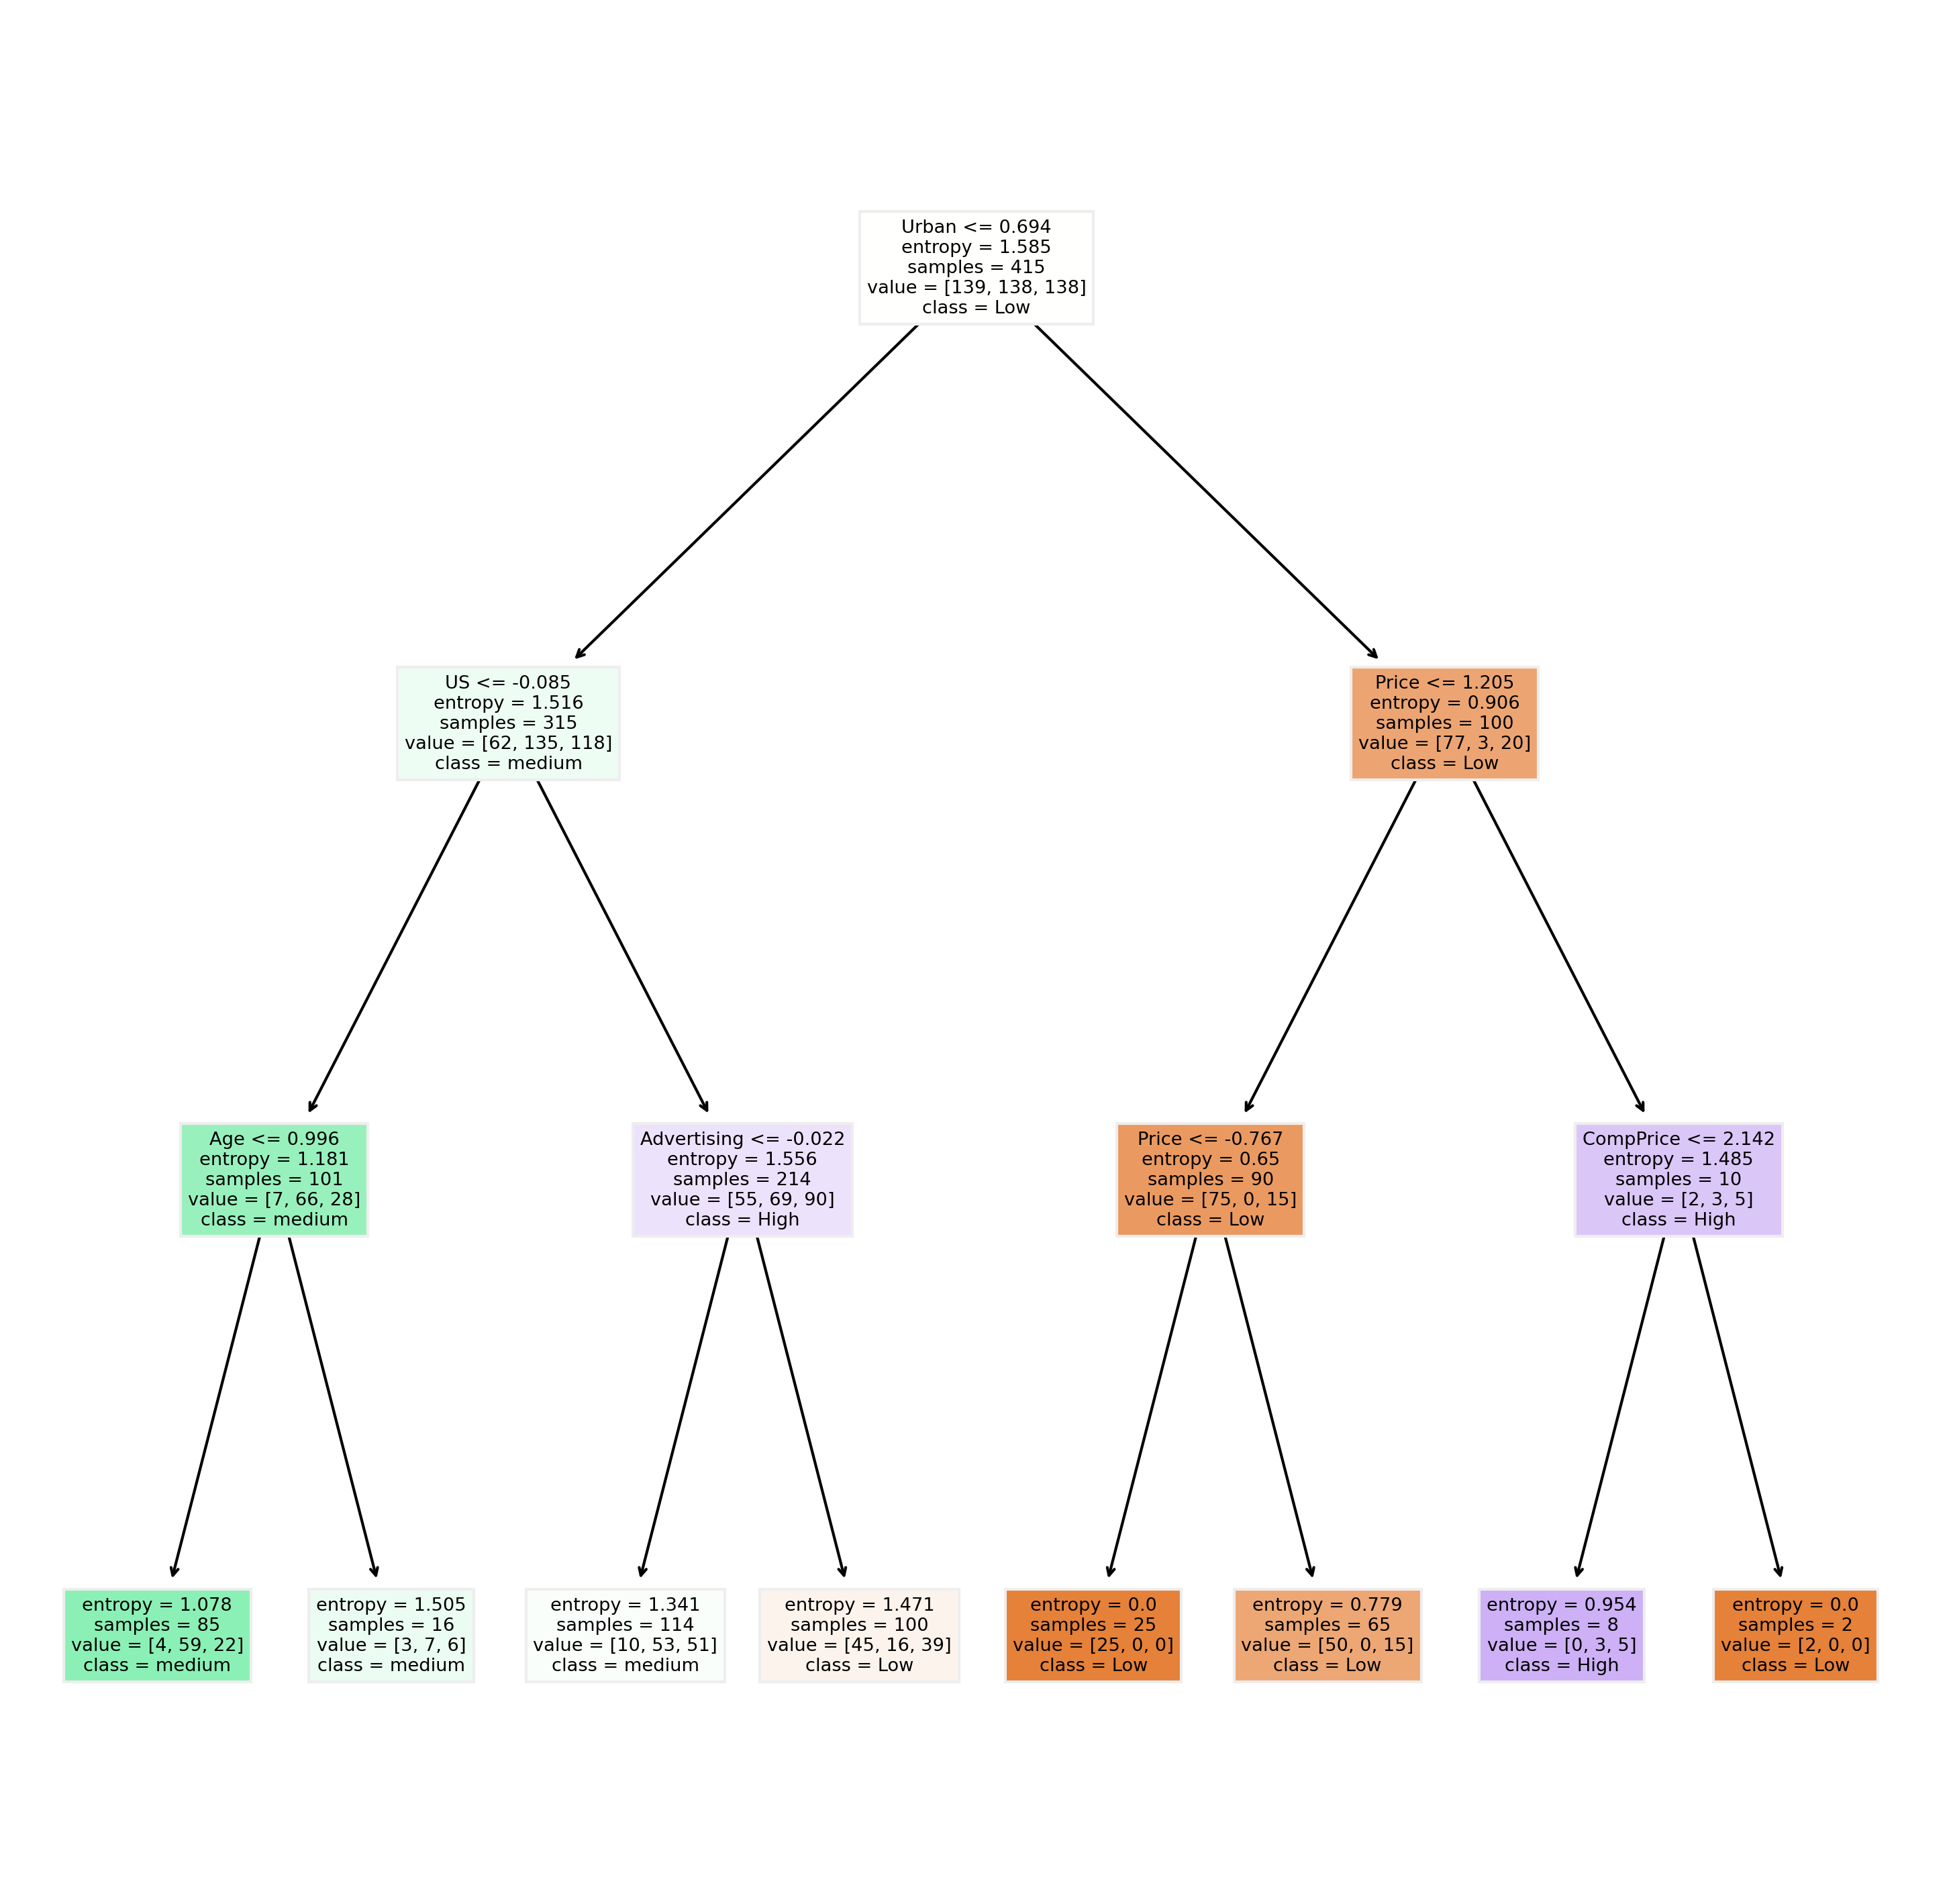

In [69]:
#PLot the decision tree
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','medium','High']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)

tree.plot_tree(model_random.estimators_[10],feature_names = fn, class_names=cn,filled = True);

### 2 Grid Search Cross Validation

In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':(list(range(1, 100))),
               'max_features': ('auto','sqrt'),
               'max_depth': (list(range(1,4))),
               }

model_grid = RandomForestClassifier()
clf_grid=GridSearchCV(model_grid, param_grid,scoring="accuracy", n_jobs=-1, verbose=1, cv=cv,return_train_score=False)
clf_grid.fit(x_train,y_train)
clf_grid.best_score_
best = clf_grid.best_params_
print(f"Best paramters: {best}")

Fitting 5 folds for each of 594 candidates, totalling 2970 fits
Best paramters: {'max_depth': 3, 'max_features': 'sqrt', 'n_estimators': 41}


### Model bulding using GridSearchCV parameters

In [48]:
model_g=clf_grid.best_estimator_

#train test accuracy for checking overfitting and underfitting

pred_train_g = model_g.predict(x_train)
print('Train data Accuracy :',accuracy_score(y_train,pred_train_g))
print('Train Report\n',classification_report(y_train,pred_train_g))
print('Confusion matrix of train \n',confusion_matrix(y_train,pred_train_g))

pred_test_g = model_g.predict(x_test)
print('\n\nTest data Accuracy  :',accuracy_score(y_test,pred_test_g))
print('Test Report\n',classification_report(y_test,pred_test_g))
print('Confusion matrix of test \n',confusion_matrix(y_test,pred_test_g))

Train data Accuracy : 0.7662650602409639
Train Report
               precision    recall  f1-score   support

           0       0.77      0.89      0.82       139
           1       0.77      0.89      0.83       138
           2       0.76      0.51      0.61       138

    accuracy                           0.77       415
   macro avg       0.77      0.77      0.75       415
weighted avg       0.77      0.77      0.75       415

Confusion matrix of train 
 [[124   6   9]
 [  2 123  13]
 [ 36  31  71]]


Test data Accuracy  : 0.7039106145251397
Test Report
               precision    recall  f1-score   support

           0       0.69      0.81      0.74        59
           1       0.74      0.87      0.80        60
           2       0.67      0.43      0.53        60

    accuracy                           0.70       179
   macro avg       0.70      0.70      0.69       179
weighted avg       0.70      0.70      0.69       179

Confusion matrix of test 
 [[48  3  8]
 [ 3 52  5]
 [

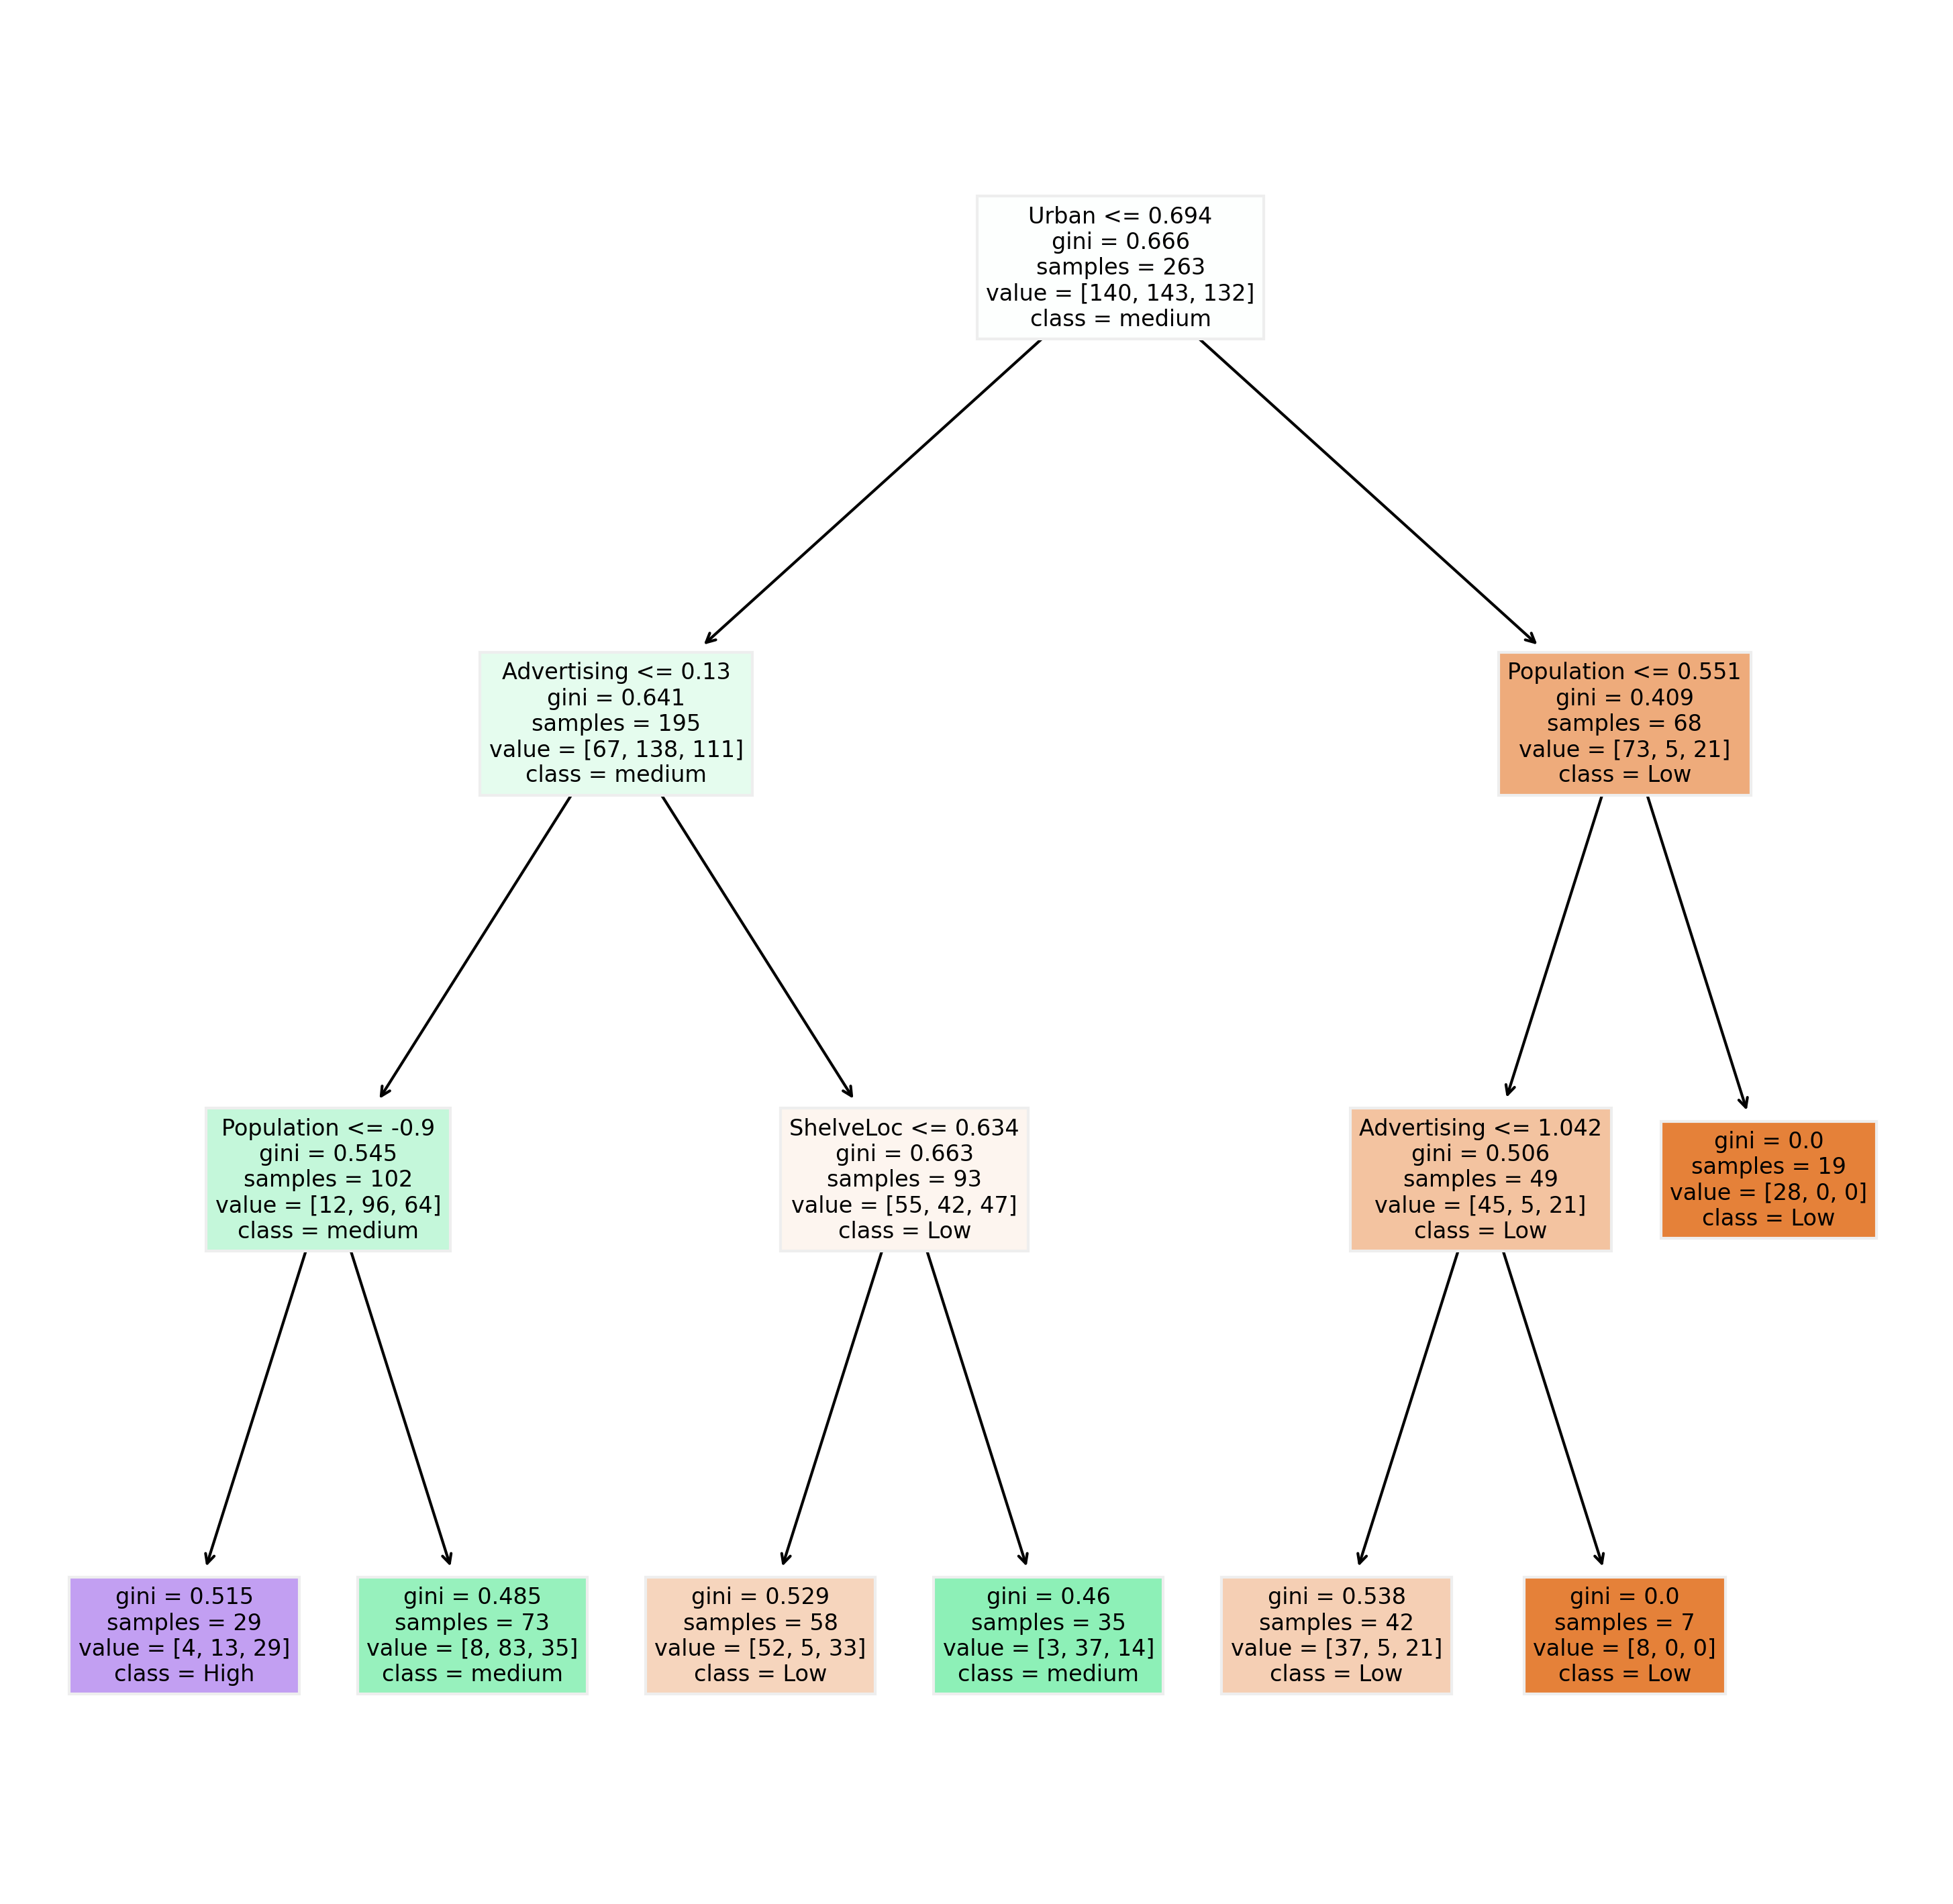

In [134]:
#PLot the decision tree
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','medium','High']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)


tree.plot_tree(model_g.estimators_[2],feature_names = fn, class_names=cn,filled = True);

### Model bulding using RandomForest Regression

In [135]:
from sklearn.ensemble import RandomForestRegressor
model_reg =RandomForestRegressor(max_depth=3,n_estimators = 100, random_state = 0)
model_reg.fit(x_train,y_train)
pred_test_reg = model_reg.predict(x_test)


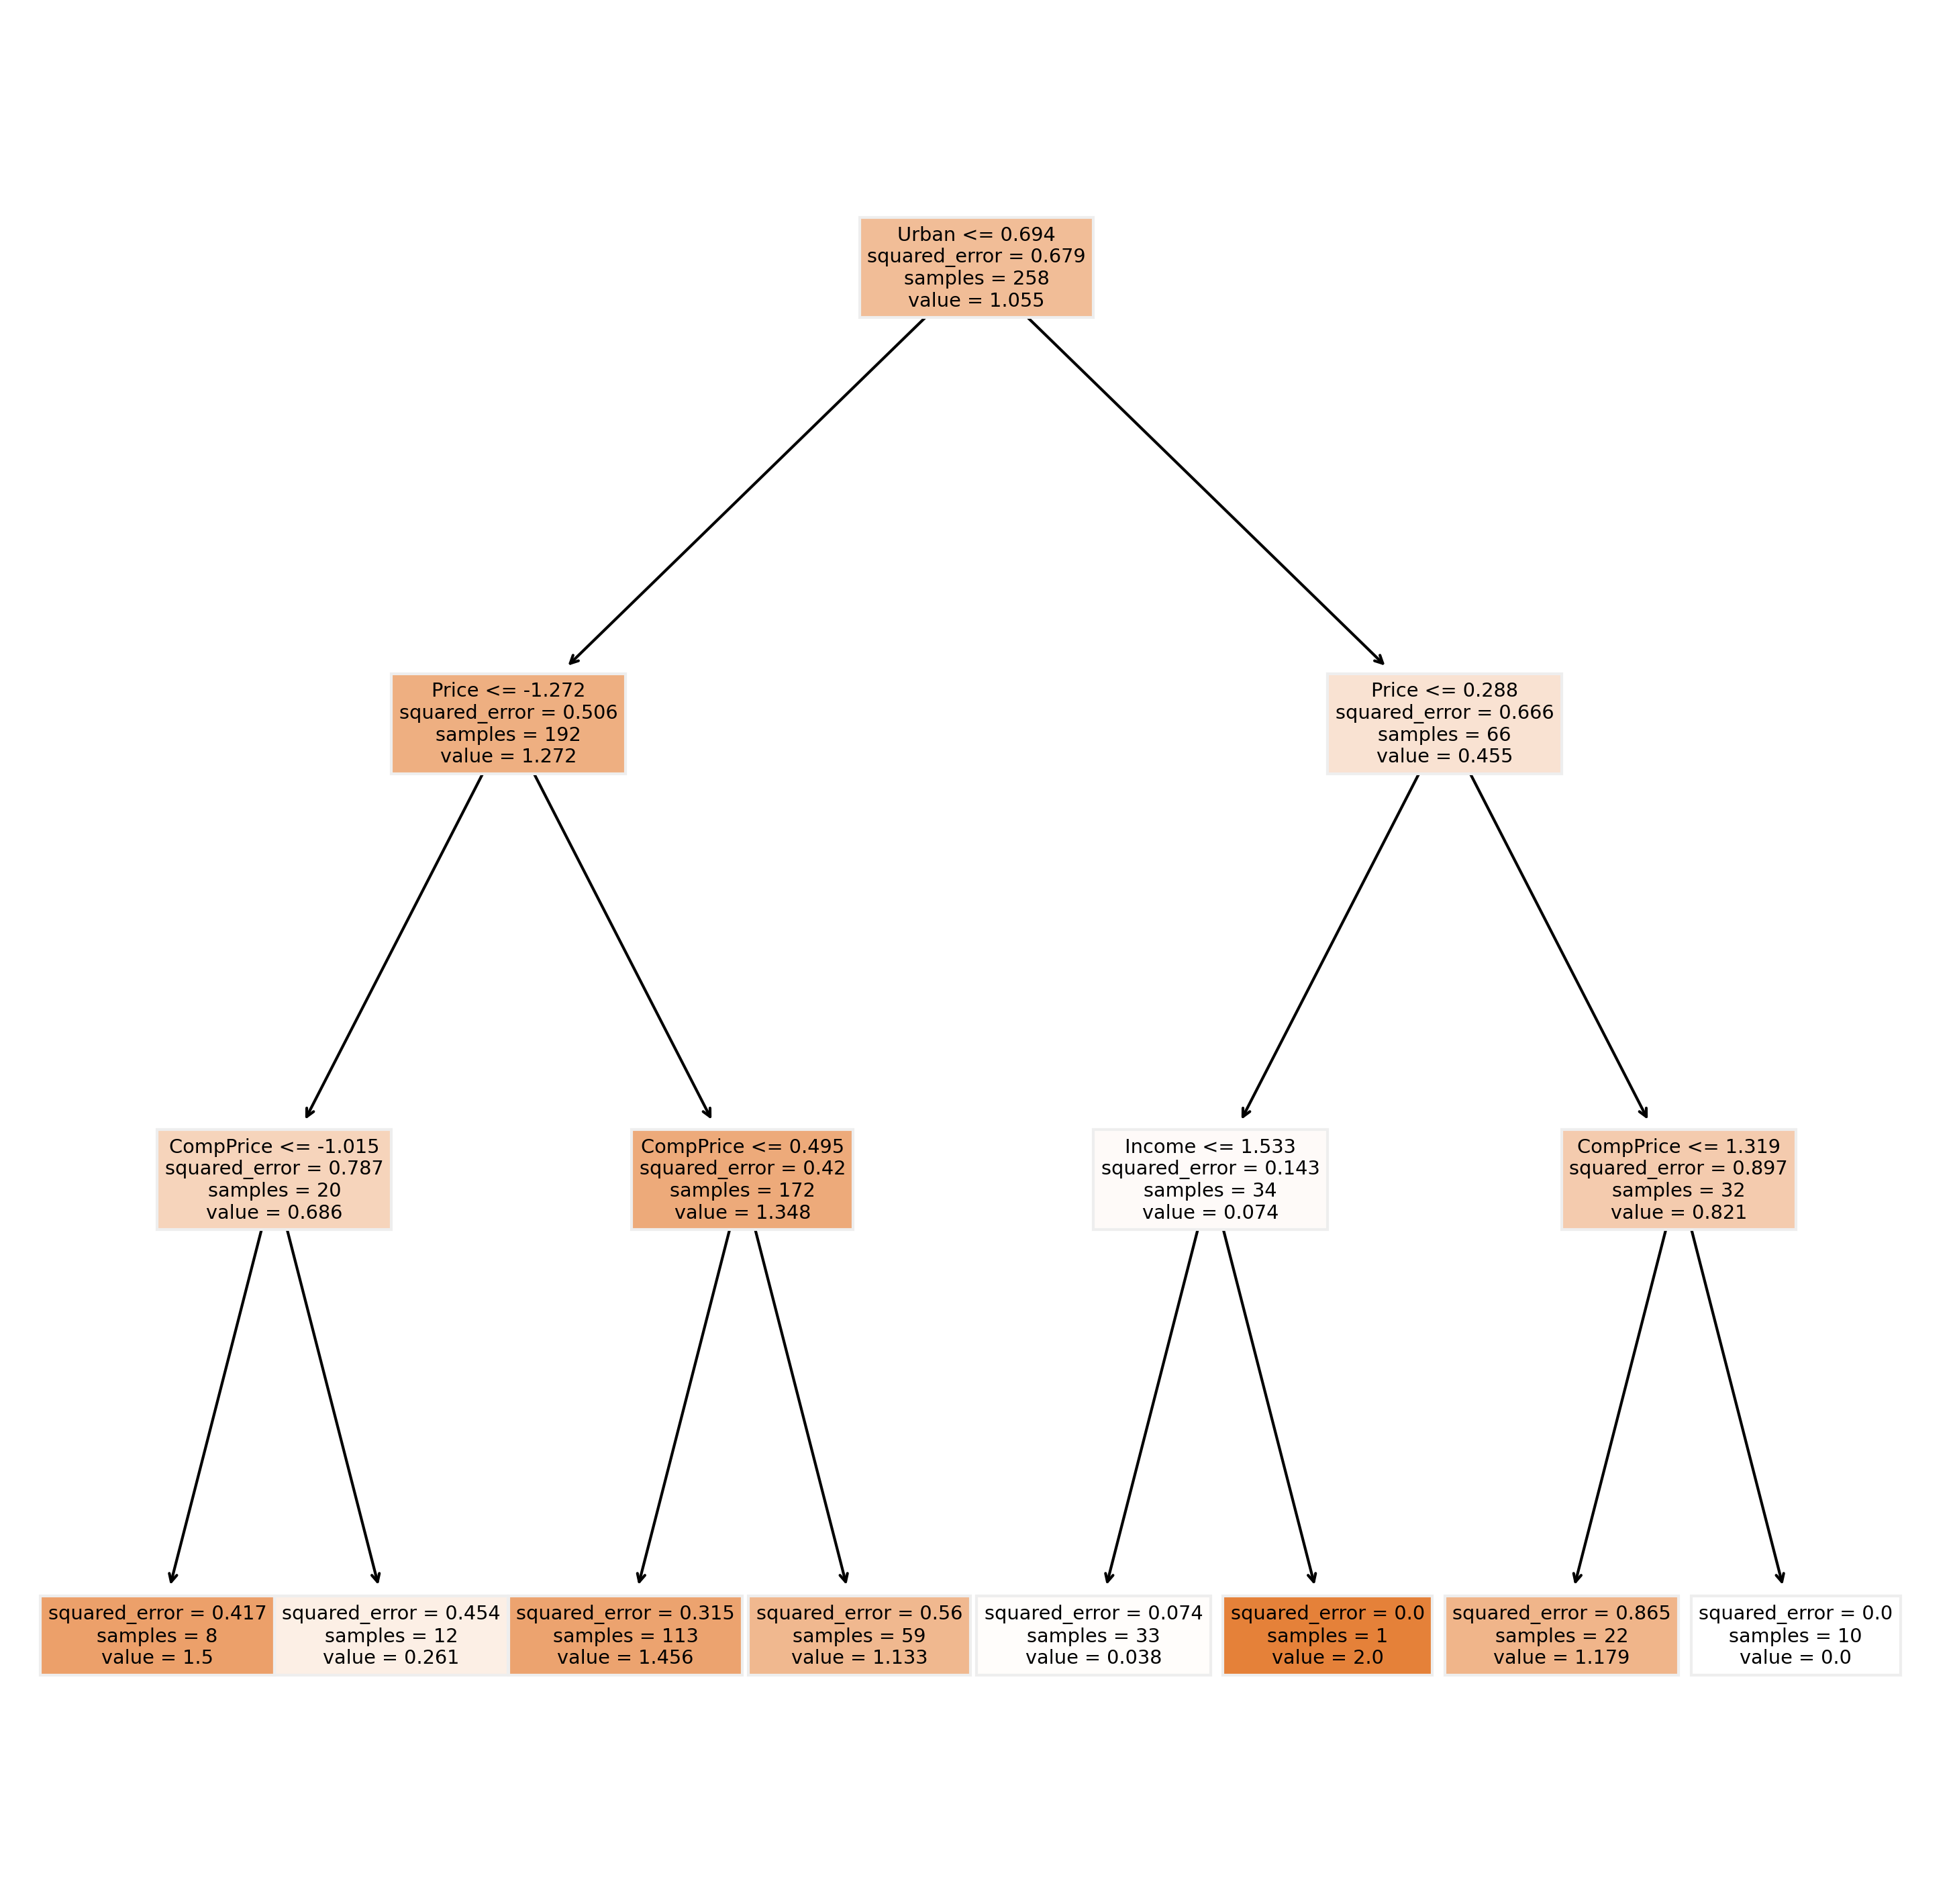

In [136]:
#PLot the decision tree
fn=['CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US']
cn=['Low','medium','High']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,6), dpi=600)

tree.plot_tree(model_reg.estimators_[10],feature_names = fn, class_names=cn,filled = True);

### Prediction for new data


In [137]:
model_random.predict([[132,113,0,131,124,76,10,0,0,1,1,0,1,0]])

array([1])

In [138]:
model_g.predict([[132,113,14,400,124,76,10,1,0,0,0,1,0,1]])

array([1])

## Conclusion
+ We have categorice the Sales in two category low, medium and heigh
+ we apply different method for balance data and find that randomoversampling gives best result
+ when we tune model with hyperparameters we find that maximum depth is 3.
+ As we show that all three model tell that urban has highy uncertanity.

